<a href="https://colab.research.google.com/github/rishi12jn/Instander/blob/main/instander.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load dataset
file_path = "/content/labeled_data1.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns
df_cleaned = df.drop(columns=["Unnamed: 0", "count", "hate_speech", "offensive_language", "neither"])

# Check for missing values
print("Missing Values:\n", df_cleaned.isnull().sum())

# Check class distribution
print("\nClass Distribution:\n", df_cleaned['class'].value_counts(normalize=True) * 100)

# Save the cleaned dataset (optional)
df_cleaned.to_csv("cleaned_data.csv", index=False)

# Display first few rows
df_cleaned.head()


Missing Values:
 class    0
tweet    0
dtype: int64

Class Distribution:
 class
1    77.432111
2    16.797805
0     5.770084
Name: proportion, dtype: float64


,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


<ipython-input-2-7cb321cfe695>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_sampled['class'], palette="coolwarm")


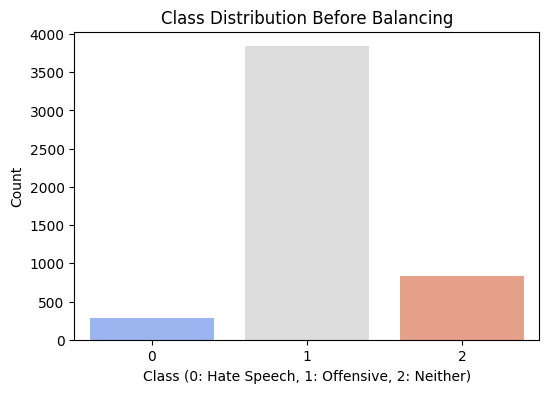

Class Distribution Before Balancing:
 class
1    77.441485
2    16.787732
0     5.770783
Name: proportion, dtype: float64
Class Distribution After Balancing:
 class
2    33.333333
1    33.333333
0    33.333333
Name: proportion, dtype: float64


<ipython-input-2-7cb321cfe695>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_balanced['class'], palette="coolwarm")


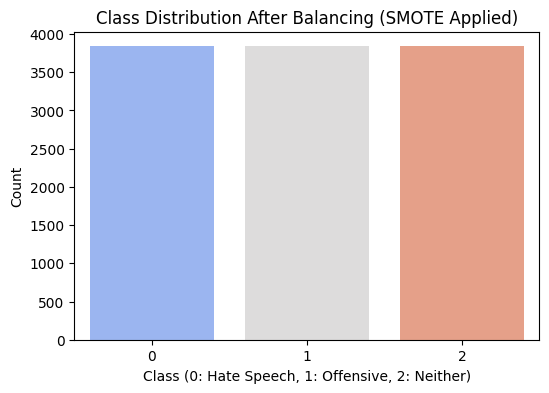

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

# 1️⃣ Load dataset
file_path = "/content/labeled_data1.csv"  # Update with actual file path
df = pd.read_csv(file_path)

# 2️⃣ Clean dataset - Drop unnecessary columns
df.columns = df.columns.str.strip()  # Remove extra spaces from column names
columns_to_drop = ["Unnamed: 0", "count", "hate_speech", "offensive_language", "neither"]
df_cleaned = df.drop(columns=columns_to_drop, errors="ignore")  # Ignore missing columns

# 3️⃣ Stratified Sampling - Keep 20% of data while preserving class distribution
df_sampled, _ = train_test_split(df_cleaned, test_size=0.8, stratify=df_cleaned['class'], random_state=42)

# 4️⃣ Check class distribution before balancing
plt.figure(figsize=(6, 4))
sns.countplot(x=df_sampled['class'], palette="coolwarm")
plt.title("Class Distribution Before Balancing")
plt.xlabel("Class (0: Hate Speech, 1: Offensive, 2: Neither)")
plt.ylabel("Count")
plt.show()

print("Class Distribution Before Balancing:\n", df_sampled['class'].value_counts(normalize=True) * 100)

# 5️⃣ Convert text into numerical format (TF-IDF) for SMOTE
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(df_sampled['tweet'])  # Convert text to numerical
y = df_sampled['class']  # Target labels

# 6️⃣ Apply SMOTE for oversampling (to balance the dataset)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

# 7️⃣ Convert resampled data back into a DataFrame
df_balanced = pd.DataFrame({'class': y_resampled})

# 8️⃣ Recover text from TF-IDF using inverse transform
df_balanced['tweet'] = vectorizer.inverse_transform(X_resampled)

# 9️⃣ Convert list of words to a single string
df_balanced['tweet'] = df_balanced['tweet'].apply(lambda x: ' '.join(x))

# 🔟 Verify class distribution after SMOTE
print("Class Distribution After Balancing:\n", df_balanced['class'].value_counts(normalize=True) * 100)

# 🔟+1 Plot class distribution after SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=df_balanced['class'], palette="coolwarm")
plt.title("Class Distribution After Balancing (SMOTE Applied)")
plt.xlabel("Class (0: Hate Speech, 1: Offensive, 2: Neither)")
plt.ylabel("Count")
plt.show()

df_balanced.to_csv("balanced_dataset.csv", index=False)



In [ ]:
import nltk
import shutil
import os

# Get the nltk_data directory
nltk_data_path = os.path.expanduser("~/nltk_data")

# Delete the directory to remove corrupted files
shutil.rmtree(nltk_data_path, ignore_errors=True)

print("✅ Old NLTK data removed.")


✅ Old NLTK data removed.


In [ ]:
import nltk

nltk.download("punkt")    # Sentence tokenizer
nltk.download("stopwords")  # Stopwords
nltk.download("wordnet")    # WordNet lemmatizer
nltk.download("omw-1.4")    # WordNet dependency
nltk.download("averaged_perceptron_tagger")  # POS tagging


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
print(word_tokenize("Hello world! This is a test."))


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['Hello', 'world', '!', 'This', 'is', 'a', 'test', '.']


In [ ]:
import pandas as pd
import re
import nltka
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Ensure necessary NLTK data is downloaded
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

# Load dataset
df = pd.read_csv("/content/balanced_dataset.csv")  # Update with your actual file path

# Ensure the correct column name
df["tweet"] = df["tweet"].astype(str)  # Convert to string if needed

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))
custom_stopwords = {"rt", "amp", "http", "https", "www"}  # Additional unwanted words

# Define text preprocessing function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r"\@\w+|\#", "", text)  # Remove mentions and hashtags
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = word_tokenize(text)  # Tokenization
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words and word not in custom_stopwords]  # Remove stopwords & lemmatize
    return " ".join(text)

# Apply text cleaning
df["cleaned_tweet"] = df["tweet"].apply(clean_text)

# Save the cleaned dataset
df.to_csv("preprocessed_dataset.csv", index=False)

print("Text preprocessing completed! Cleaned dataset saved.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Text preprocessing completed! Cleaned dataset saved.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-7-e23b184c888e>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["class"], palette="coolwarm")


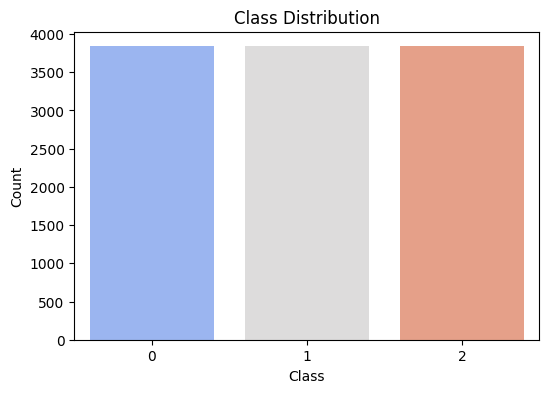

<ipython-input-7-e23b184c888e>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[w[0] for w in most_common_words], y=[w[1] for w in most_common_words], palette="viridis")


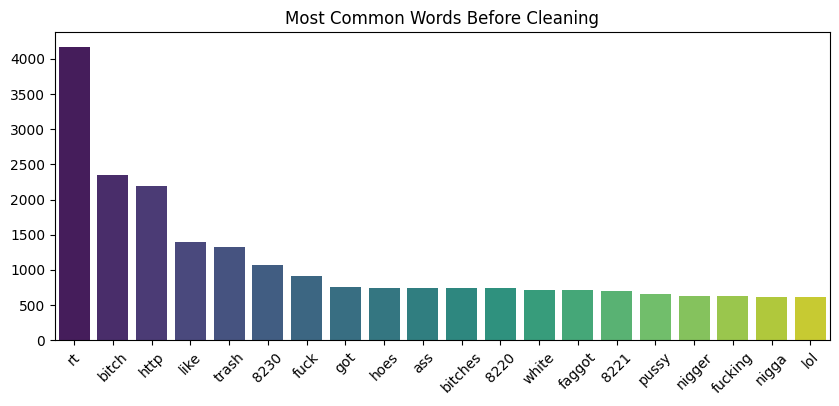

<ipython-input-7-e23b184c888e>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[w[0] for w in most_common_clean_words], y=[w[1] for w in most_common_clean_words], palette="magma")


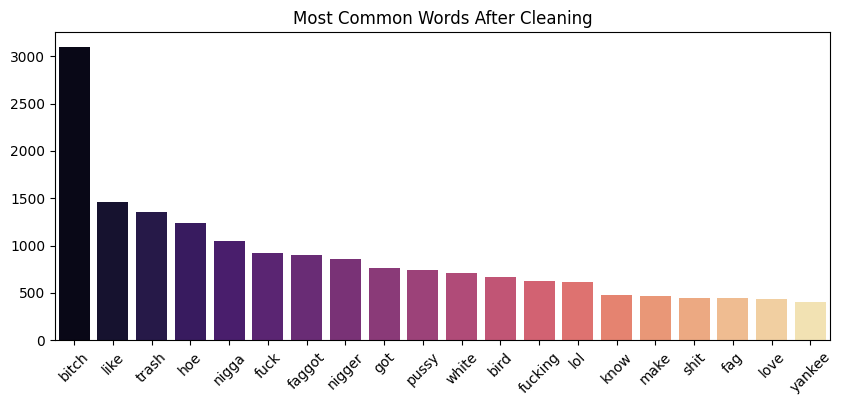

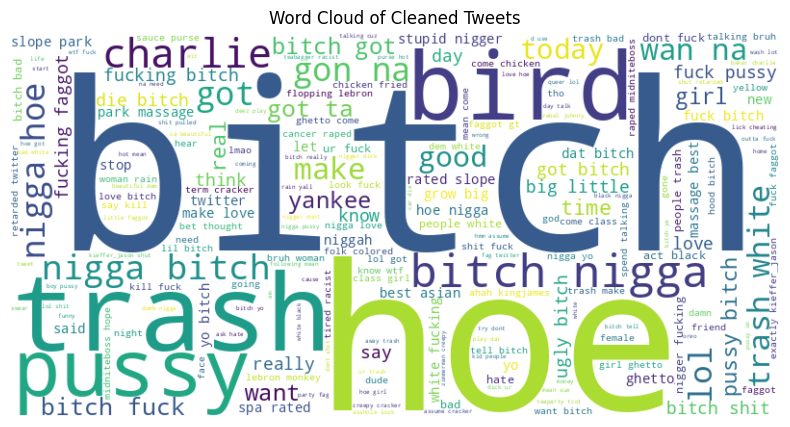

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud

# Ensure necessary NLTK data is downloaded
nltk.download("stopwords")
nltk.download("punkt")

# Load the cleaned dataset
df = pd.read_csv("/content/preprocessed_dataset.csv")

# Convert 'cleaned_tweet' and 'tweet' to strings and handle NaN values
df["tweet"] = df["tweet"].astype(str).fillna("")
df["cleaned_tweet"] = df["cleaned_tweet"].astype(str).fillna("")

# Class Distribution Visualization
plt.figure(figsize=(6, 4))
sns.countplot(x=df["class"], palette="coolwarm")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Initialize stop words
stop_words = set(stopwords.words("english"))

# Most Frequent Words Before Cleaning
all_words = " ".join(df["tweet"])
words = word_tokenize(re.sub(r"\W+", " ", all_words.lower()))
filtered_words = [word for word in words if word not in stop_words]

word_freq = Counter(filtered_words)
most_common_words = word_freq.most_common(20)

plt.figure(figsize=(10, 4))
sns.barplot(x=[w[0] for w in most_common_words], y=[w[1] for w in most_common_words], palette="viridis")
plt.xticks(rotation=45)
plt.title("Most Common Words Before Cleaning")
plt.show()

# Most Frequent Words After Cleaning
all_clean_words = " ".join(df["cleaned_tweet"])
clean_words = word_tokenize(re.sub(r"\W+", " ", all_clean_words.lower()))
filtered_clean_words = [word for word in clean_words if word not in stop_words]

clean_word_freq = Counter(filtered_clean_words)
most_common_clean_words = clean_word_freq.most_common(20)

plt.figure(figsize=(10, 4))
sns.barplot(x=[w[0] for w in most_common_clean_words], y=[w[1] for w in most_common_clean_words], palette="magma")
plt.xticks(rotation=45)
plt.title("Most Common Words After Cleaning")
plt.show()

# Word Cloud of Cleaned Tweets
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_clean_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Cleaned Tweets")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm

# 🚀 Step 1: Load Dataset
df = pd.read_csv("/content/preprocessed_dataset.csv")
df["cleaned_tweet"] = df["cleaned_tweet"].astype(str).fillna("")

# Rename 'class' column to 'label' (if needed)
df.rename(columns={"class": "label"}, inplace=True)

# 🚀 Step 2: Tokenize & Encode Data
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Convert labels to integers (0,1,2)
label_mapping = {label: idx for idx, label in enumerate(df["label"].unique())}
df["label"] = df["label"].map(label_mapping)

# 🚀 Step 3: Custom Dataset Class
class HateSpeechDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        encoding = self.tokenizer(
            text, padding="max_length", truncation=True, max_length=self.max_len, return_tensors="pt"
        )

        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "label": torch.tensor(label, dtype=torch.long),
        }

# 🚀 Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df["cleaned_tweet"], df["label"], test_size=0.2, random_state=42)

train_dataset = HateSpeechDataset(X_train.tolist(), y_train.tolist(), tokenizer)
test_dataset = HateSpeechDataset(X_test.tolist(), y_test.tolist(), tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# 🚀 Step 5: Load Pretrained BERT Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)
model.to(device)

# 🚀 Step 6: Define Optimizer & Loss
optimizer = AdamW(model.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()

# 🚀 Step 7: Train the Model
epochs = 4
for epoch in range(epochs):
    model.train()
    total_loss = 0
    loop = tqdm(train_loader, leave=True)

    for batch in loop:
        input_ids, attention_mask, labels = (
            batch["input_ids"].to(device),
            batch["attention_mask"].to(device),
            batch["label"].to(device),
        )

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        loop.set_description(f"Epoch {epoch+1}/{epochs}")
        loop.set_postfix(loss=loss.item())

print("✅ Training Complete!")

# 🚀 Step 8: Evaluate Model
model.eval()
preds, true_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = (
            batch["input_ids"].to(device),
            batch["attention_mask"].to(device),
            batch["label"].to(device),
        )

        outputs = model(input_ids, attention_mask=attention_mask)
        preds.extend(torch.argmax(outputs.logits, dim=1).cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Convert label mapping keys to strings
target_names = [str(label) for label in label_mapping.keys()]
print(classification_report(true_labels, preds, target_names=target_names))


# 🚀 Step 9: Save Model
torch.save(model.state_dict(), "fine_tuned_bert_hate_speech.pth")
print("✅ Model saved successfully!")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 4/4: 100%|██████████| 576/576 [03:15<00:00,  2.95it/s, loss=0.00781]


✅ Training Complete!
              precision    recall  f1-score   support

           2       0.98      0.99      0.98       760
           1       0.95      0.95      0.95       802
           0       0.96      0.96      0.96       741

    accuracy                           0.96      2303
   macro avg       0.96      0.96      0.96      2303
weighted avg       0.96      0.96      0.96      2303

✅ Model saved successfully!


In [ ]:
import numpy as np
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader
from torch.optim import AdamW
from torch.cuda.amp import autocast, GradScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# Initialize gradient scaler for mixed precision training
scaler = GradScaler()

# Load Dataset
df = pd.read_csv("/content/preprocessed_dataset.csv")
df["cleaned_tweet"] = df["cleaned_tweet"].astype(str).fillna("")
df.rename(columns={"class": "label"}, inplace=True)

# Tokenizer & Label Encoding
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
label_mapping = {label: idx for idx, label in enumerate(df["label"].unique())}
df["label"] = df["label"].map(label_mapping)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(df["cleaned_tweet"], df["label"], test_size=0.2, random_state=42)

# Custom Dataset Class
class HateSpeechDataset(torch.utils.data.Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(self.texts[idx], padding='max_length', truncation=True, max_length=self.max_len, return_tensors='pt')
        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "label": torch.tensor(self.labels[idx], dtype=torch.long),
        }

# Fitness Function for Hyperparameter Evaluation
def evaluate_model(params):
    lr, batch_size, weight_decay = params
    batch_size = max(8, int(batch_size))

    train_dataset = HateSpeechDataset(X_train.tolist(), y_train.tolist(), tokenizer)
    test_dataset = HateSpeechDataset(X_test.tolist(), y_test.tolist(), tokenizer)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)
    model.to(device)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    criterion = torch.nn.CrossEntropyLoss()

    model.train()
    for epoch in range(1):  # Train for 1 epoch per evaluation
        for batch in tqdm(train_loader, desc="Evaluating Model", leave=False):
            input_ids, attention_mask, labels = batch["input_ids"].to(device), batch["attention_mask"].to(device), batch["label"].to(device)
            optimizer.zero_grad()
            with autocast():
                outputs = model(input_ids, attention_mask=attention_mask)
                loss = criterion(outputs.logits, labels)
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

    model.eval()
    preds, true_labels = [], []
    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = batch["input_ids"].to(device), batch["attention_mask"].to(device), batch["label"].to(device)
            outputs = model(input_ids, attention_mask=attention_mask)
            preds.extend(torch.argmax(outputs.logits, dim=1).cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    return accuracy_score(true_labels, preds)

# Flower Pollination Algorithm (FPA) for Hyperparameter Optimization
def fpa_optimization(pop_size=5, generations=3):
    np.random.seed(42)

    # Hyperparameter Search Space
    lower_bounds = [1e-6, 8, 0.0]  # [learning rate, batch size, weight decay]
    upper_bounds = [5e-5, 32, 0.2]

    # Initialize Population
    population = np.random.uniform(low=lower_bounds, high=upper_bounds, size=(pop_size, 3))
    best_solution, best_fitness = None, 0

    for gen in range(generations):
        for i in range(pop_size):
            fitness = evaluate_model(population[i])
            if fitness > best_fitness:
                best_fitness, best_solution = fitness, population[i]

            # Global Pollination (Levy Flight)
            if np.random.rand() < 0.8:
                levy_step = np.random.uniform(-1, 1, size=3) * 0.1
                population[i] += levy_step
            else:
                # Local Pollination (Crossover)
                partner = population[np.random.randint(0, pop_size)]
                population[i] = (population[i] + partner) / 2

            # Ensure Bounds
            population[i] = np.clip(population[i], lower_bounds, upper_bounds)

    print(f"✅ Best Hyperparameters Found: LR={best_solution[0]:.6f}, Batch Size={int(best_solution[1])}, Weight Decay={best_solution[2]:.4f}")
    return best_solution

# Run Hyperparameter Optimization
best_hyperparams = fpa_optimization()

# Train Final Model with Optimized Hyperparameters
optimized_lr, optimized_batch_size, optimized_weight_decay = best_hyperparams
optimized_batch_size = int(optimized_batch_size)

train_dataset = HateSpeechDataset(X_train.tolist(), y_train.tolist(), tokenizer)
test_dataset = HateSpeechDataset(X_test.tolist(), y_test.tolist(), tokenizer)
train_loader = DataLoader(train_dataset, batch_size=optimized_batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=optimized_batch_size, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)
model.to(device)
optimizer = AdamW(model.parameters(), lr=optimized_lr, weight_decay=optimized_weight_decay)
criterion = torch.nn.CrossEntropyLoss()

print("\n🚀 Training Final Model with Optimized Hyperparameters...")
for epoch in range(4):  # Train for more epochs with optimal parameters
    model.train()
    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/4"):
        input_ids, attention_mask, labels = batch["input_ids"].to(device), batch["attention_mask"].to(device), batch["label"].to(device)
        optimizer.zero_grad()
        with autocast():
            outputs = model(input_ids, attention_mask=attention_mask)
            loss = criterion(outputs.logits, labels)
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

# Save the optimized model
torch.save(model.state_dict(), "optimized_bert_hate_speech.pth")
print("\n✅ Optimized Model Saved Successfully!")


<ipython-input-10-583546df6d87>:13: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Evaluating Model:   0%|          | 0/308 [00:00<?, ?it/s]<ipython-input-10-583546df6d87>:68: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inf

✅ Best Hyperparameters Found: LR=0.000050, Batch Size=28, Weight Decay=0.1314


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🚀 Training Final Model with Optimized Hyperparameters...


Epoch 1/4:   0%|          | 0/329 [00:00<?, ?it/s]<ipython-input-10-583546df6d87>:143: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Epoch 4/4: 100%|██████████| 329/329 [00:56<00:00,  5.87it/s]



✅ Optimized Model Saved Successfully!


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the trained model
def evaluate_final_model(model, test_loader):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    preds, true_labels = [], []

    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = (
                batch["input_ids"].to(device),
                batch["attention_mask"].to(device),
                batch["label"].to(device),
            )

            with torch.amp.autocast(device_type="cuda"):
                outputs = model(input_ids, attention_mask=attention_mask)

            preds.extend(torch.argmax(outputs.logits, dim=1).cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(true_labels, preds)
    print(f"✅ Model Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:\n", classification_report(true_labels, preds))

# Call the evaluation function
evaluate_final_model(model, test_loader)



✅ Model Accuracy: 96.48%

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       760
           1       0.93      0.97      0.95       802
           2       0.98      0.96      0.97       741

    accuracy                           0.96      2303
   macro avg       0.97      0.96      0.97      2303
weighted avg       0.97      0.96      0.96      2303

